### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 1#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

        date  item  sales
0 2013-01-01     1     13
1 2013-01-02     1     11
2 2013-01-03     1     14
3 2013-01-04     1     13
4 2013-01-05     1     10
            item  sales
date                   
2013-01-01    10    133
2013-01-02    10     99
2013-01-03    10    127
2013-01-04    10    145
2013-01-05    10    149
            sales
date             
2013-01-01    133
2013-01-02     99
2013-01-03    127
2013-01-04    145
2013-01-05    149
[127]


# ii. analysis

In [5]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06    802
2013-01-13    863
2013-01-20    865
2013-01-27    799
2013-02-03    954
            sales
date             
2013-01-31   3794
2013-02-28   3863
2013-03-31   5190
2013-04-30   5783
2013-05-31   6298
            sales
date             
2016-12-26    150
2016-12-27    159
2016-12-28    158
2016-12-29    186
2016-12-30    220


c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

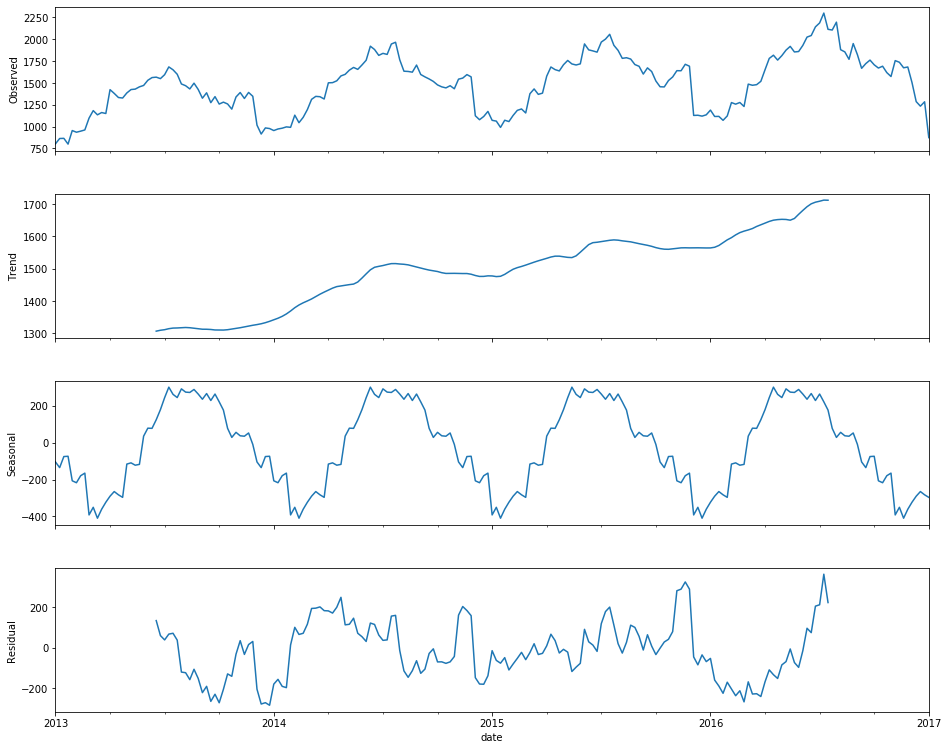

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [8]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

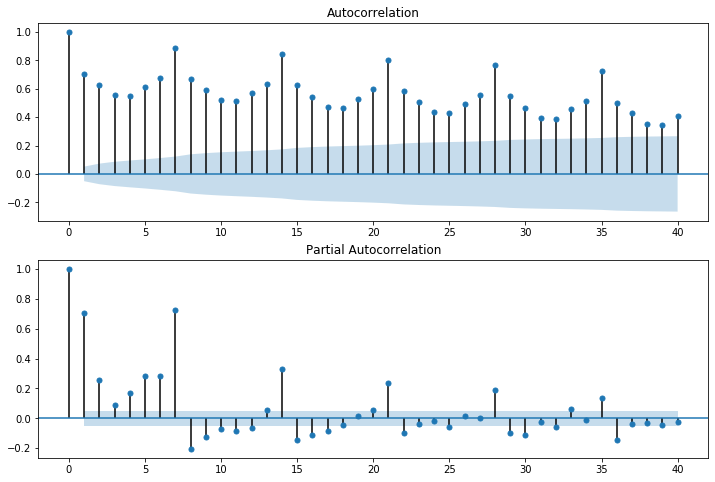

In [9]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

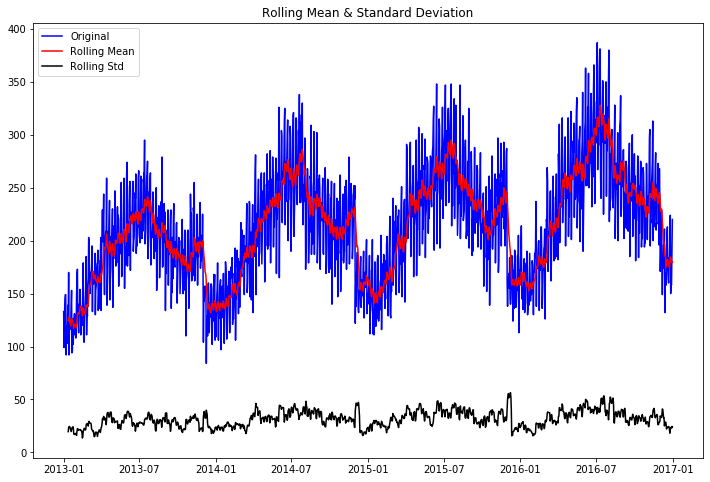

Results of Dickey-Fuller Test:
p-value = 0.1230. The series is likely non-stationary.
Test Statistic                   -2.469827
p-value                           0.122989
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [10]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [11]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

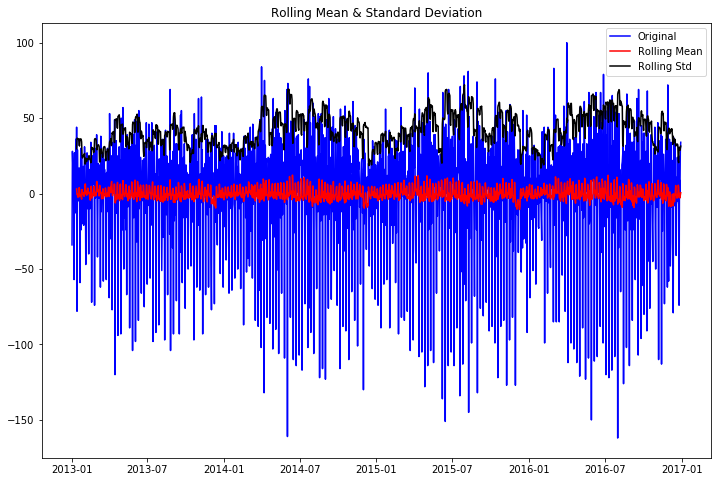

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.024773e+01
p-value                        4.570624e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [12]:
test_stationarity(first_diff, window = 12)

In [13]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02  -34.0
1    2013-01-03   28.0
2    2013-01-04   18.0
3    2013-01-05    4.0
4    2013-01-06    0.0
5    2013-01-07  -57.0
6    2013-01-08   27.0
7    2013-01-09   -5.0
8    2013-01-10  -11.0
9    2013-01-11   36.0
10   2013-01-12  -13.0
11   2013-01-13   44.0
12   2013-01-14  -78.0
13   2013-01-15   29.0
14   2013-01-16   -5.0
15   2013-01-17    6.0
16   2013-01-18    0.0
17   2013-01-19   17.0
18   2013-01-20   14.0
19   2013-01-21  -59.0
20   2013-01-22    2.0
21   2013-01-23   30.0
22   2013-01-24  -24.0
23   2013-01-25   24.0
24   2013-01-26   -2.0
25   2013-01-27    7.0
26   2013-01-28  -20.0
27   2013-01-29   18.0
28   2013-01-30  -21.0
29   2013-01-31    9.0
...         ...    ...
1429 2016-12-01  -58.0
1430 2016-12-02   16.0
1431 2016-12-03   36.0
1432 2016-12-04    6.0
1433 2016-12-05  -48.0
1434 2016-12-06  -32.0
1435 2016-12-07   34.0
1436 2016-12-08   -9.0
1437 2016-12-09   22.0
1438 2016-12-10   -

# Step 4: Plot ACF and PACF plots

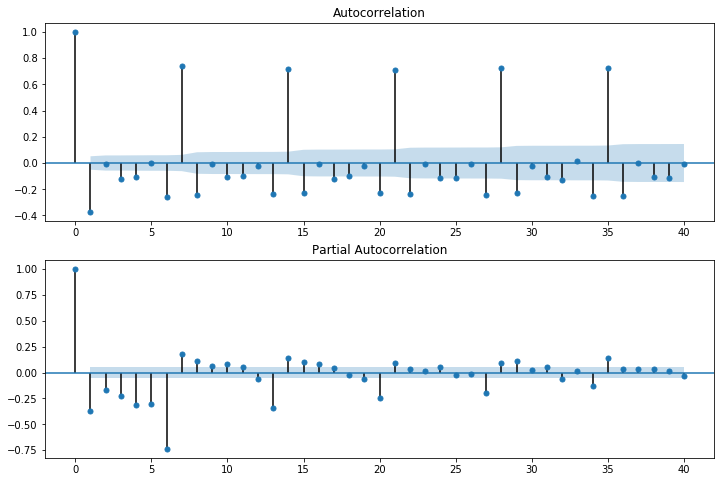

In [14]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


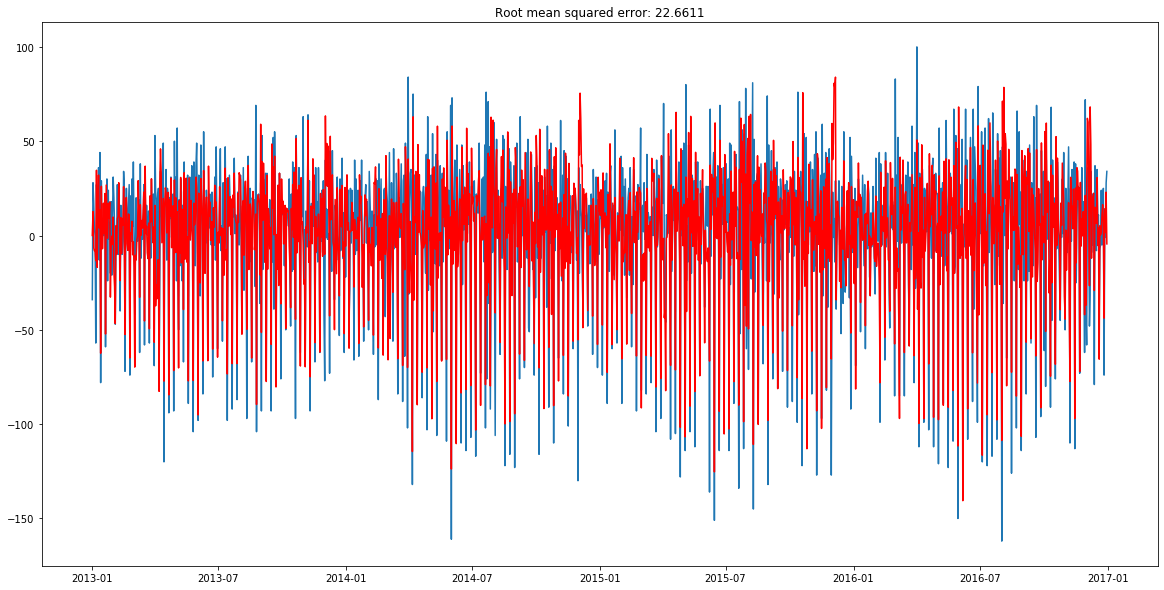

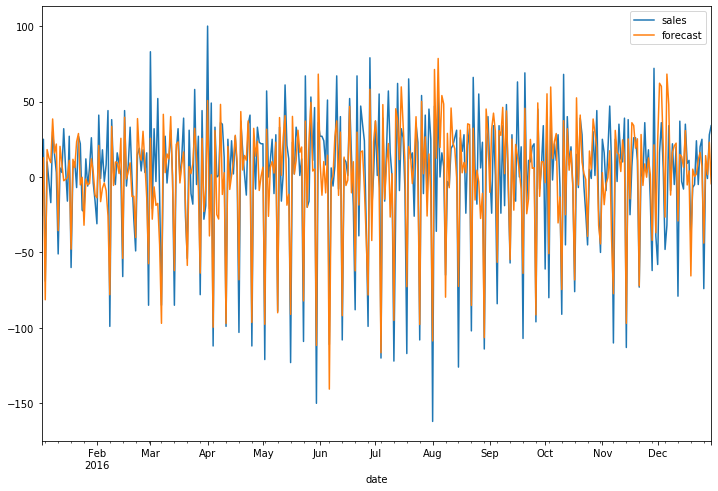

In [15]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [16]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[133]
 [ 99]
 [127]
 ...
 [158]
 [186]
 [220]]


In [17]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[133]
adding 0 [99] + 0.0 [99]
adding 1 [127] + 0.04007601251081638 [127]
adding 2 [145] + 12.673842329135462 [157]
adding 3 [149] + -6.481059835371486 [142]
adding 4 [149] + -8.021584558774897 [140]
adding 5 [92] + -7.83143969221298 [84]
adding 6 [119] + -13.338259308086307 [105]
adding 7 [114] + 34.613257895768065 [148]
adding 8 [103] + -16.883344888534143 [86]
adding 9 [139] + 16.12259402474726 [155]
adding 10 [126] + 32.05220041880583 [158]
adding 11 [170] + 3.961981820814021 [173]
adding 12 [92] + 13.635293687545477 [105]
adding 13 [121] + -62.38069543412551 [58]
adding 14 [116] + 26.114098735239544 [142]
adding 15 [122] + -7.049012832110866 [114]
adding 16 [122] + -6.801722871371378 [115]
adding 17 [139] + 17.10087189694115 [156]
adding 18 [153] + 1.0618435162710256 [154]
adding 19 [94] + 22.251458707021257 [116]
adding 20 [96] + -52.20958111292223 [43]
adding 21 [126] + 26.764243915030004 [152]
adding 22 [102] + 13.266623724320592 [115]
adding 23 [126] + -1.4378017039662225 [124

adding 373 [151] + 2.391966306643635 [153]
adding 374 [159] + 17.52063510130137 [176]
adding 375 [163] + 2.8249072806466096 [165]
adding 376 [97] + 12.161550788399364 [109]
adding 377 [137] + -27.31894854513027 [109]
adding 378 [127] + 8.493156015525035 [135]
adding 379 [157] + -1.4000441800552643 [155]
adding 380 [149] + 2.348288163663952 [151]
adding 381 [145] + -1.7110368862676886 [143]
adding 382 [169] + 5.6814592514081745 [174]
adding 383 [105] + 9.63093766911124 [114]
adding 384 [103] + -57.21286035085947 [45]
adding 385 [132] + 32.167854114206115 [164]
adding 386 [140] + 17.040844801289456 [157]
adding 387 [180] + 20.89112881740214 [200]
adding 388 [173] + 5.2670511572332686 [178]
adding 389 [163] + -27.481191194064966 [135]
adding 390 [107] + -4.93421343656556 [102]
adding 391 [110] + -48.45863850886037 [61]
adding 392 [130] + 3.5022847095606515 [133]
adding 393 [157] + 21.549851369949742 [178]
adding 394 [153] + 10.499209589531986 [163]
adding 395 [171] + 19.31128743579122 [19

adding 722 [170] + 0.09337481765563105 [170]
adding 723 [156] + -15.90641409457694 [140]
adding 724 [187] + -8.149374684480163 [178]
adding 725 [201] + 15.900021334292205 [216]
adding 726 [131] + -1.229114637302665 [129]
adding 727 [150] + -57.72886024403243 [92]
adding 728 [140] + 30.915797735992513 [170]
adding 729 [143] + 13.09939270339229 [156]
adding 730 [156] + 22.893111095232335 [178]
adding 731 [165] + 10.630801263966964 [175]
adding 732 [186] + 24.25428033866041 [210]
adding 733 [112] + 21.582729473017615 [133]
adding 734 [131] + -47.461995949461425 [83]
adding 735 [135] + 33.188170335095144 [168]
adding 736 [143] + 4.707683710772963 [147]
adding 737 [172] + 8.662088003611112 [180]
adding 738 [168] + 12.013617361718168 [180]
adding 739 [201] + -6.478589555556317 [194]
adding 740 [112] + 10.225277819810376 [122]
adding 741 [135] + -72.53995080382236 [62]
adding 742 [130] + 21.753816971305923 [151]
adding 743 [111] + 0.7341057258350183 [111]
adding 744 [143] + 13.771264197856112

adding 1089 [205] + -4.519412324665083 [200]
adding 1090 [113] + 0.08963119286399035 [113]
adding 1091 [155] + -51.69204002713054 [103]
adding 1092 [172] + 25.95994938247475 [197]
adding 1093 [163] + -1.0009521062761308 [161]
adding 1094 [182] + -6.64081403018071 [175]
adding 1095 [189] + 18.953980120936293 [207]
adding 1096 [214] + -25.477633933560554 [188]
adding 1097 [145] + 12.767194032784229 [157]
adding 1098 [155] + -81.36974609128224 [73]
adding 1099 [152] + 18.14149274319974 [170]
adding 1100 [135] + 12.55890401873863 [147]
adding 1101 [165] + 9.520438930182465 [174]
adding 1102 [180] + 38.44700327486115 [218]
adding 1103 [183] + 15.864146532556475 [198]
adding 1104 [132] + 21.816191925429287 [153]
adding 1105 [138] + -35.52019014107766 [102]
adding 1106 [141] + 20.291094763493632 [161]
adding 1107 [173] + 9.020573373124686 [182]
adding 1108 [179] + -2.483453100495666 [176]
adding 1109 [163] + -1.5030348431609184 [161]
adding 1110 [190] + -0.20284607171973157 [189]
adding 1111 

In [18]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02     0.040076
2013-01-03    12.673842
2013-01-04    -6.481060
2013-01-05    -8.021585
2013-01-06    -7.831440
dtype: float64
cumsum date
2013-01-02     0.040076
2013-01-03    12.713918
2013-01-04     6.232859
2013-01-05    -1.788726
2013-01-06    -9.620166
dtype: float64


In [19]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [20]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 49.35650295109697 The range of data is 0 to  387


### i.b) plot original vs fitted values in original scale

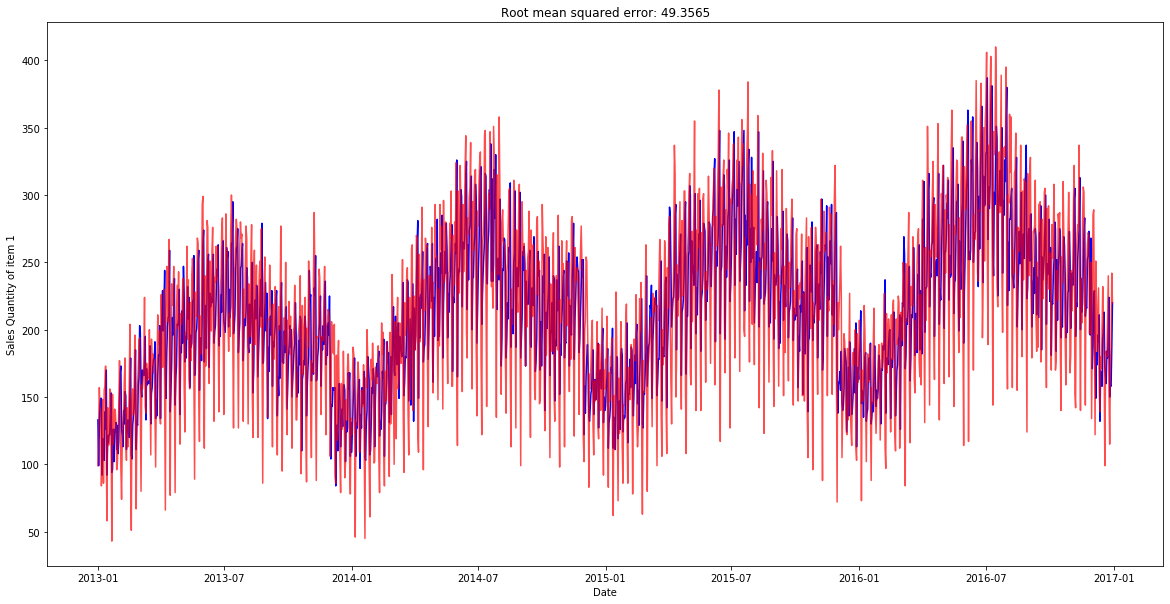

1460 1460


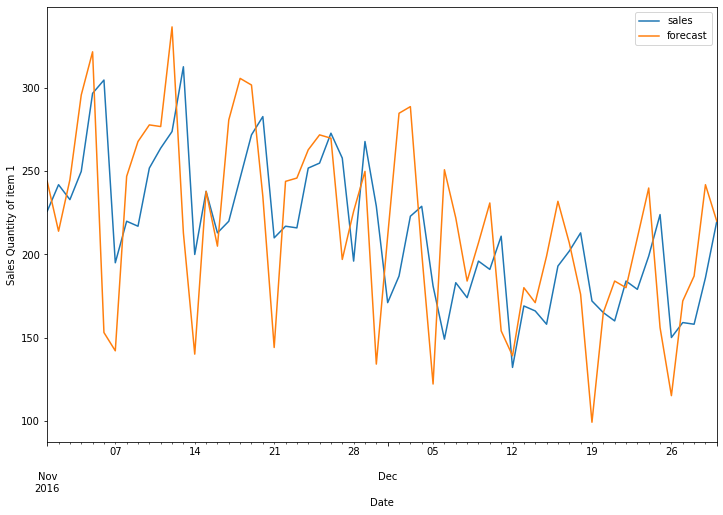

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [22]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


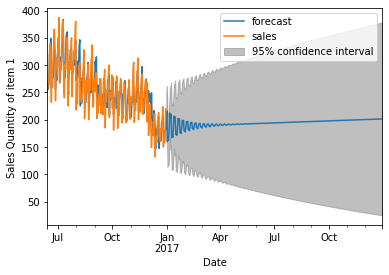

In [23]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    205.460142
2017-01-01    215.972248
2017-01-02    159.661324
2017-01-03    165.518862
2017-01-04    163.144905
Freq: D, dtype: float64


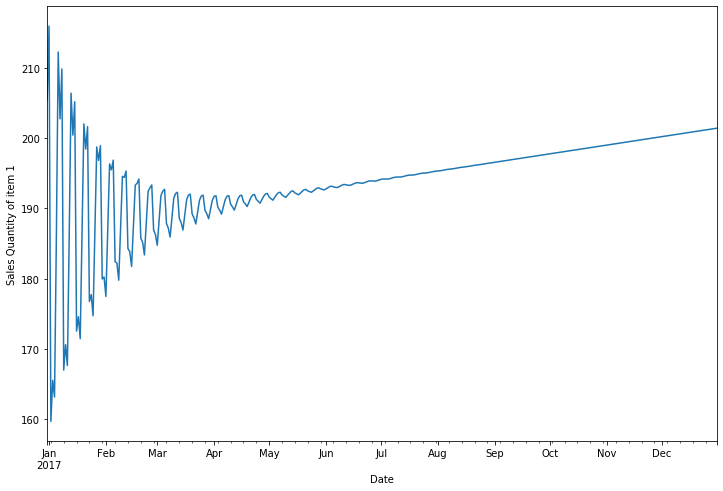

In [24]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

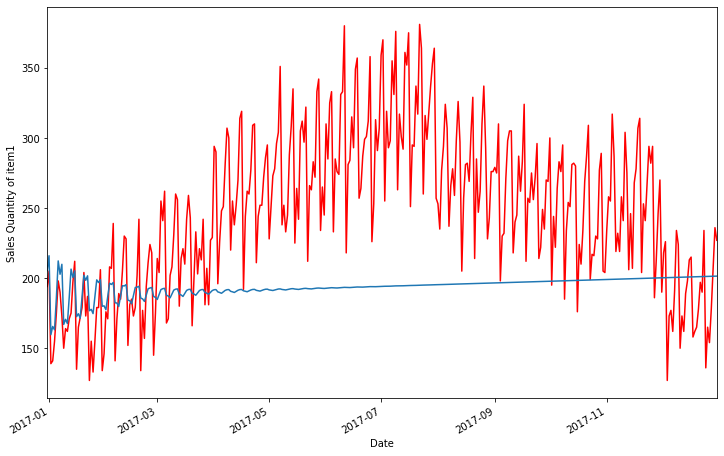

In [25]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [30]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    167.460142
2017-01-01    199.512107
2017-01-02    157.689076
2017-01-03    150.857538
2017-01-04    152.626043
2017-01-05    174.839938
2017-01-06    161.287375
2017-01-07    155.491860
2017-01-08    187.093613
2017-01-09    140.119228
2017-01-10    135.617163
2017-01-11    135.020235
2017-01-12    159.487405
2017-01-13    193.325145
2017-01-14    173.009065
2017-01-15    167.758760
2017-01-16    157.328715
2017-01-17    132.050722
2017-01-18    132.873604
2017-01-19    160.865656
2017-01-20    154.720877
2017-01-21    162.431786
2017-01-22    191.173096
2017-01-23    141.098009
2017-01-24    143.981210
2017-01-25    151.988256
2017-01-26    160.885016
2017-01-27    167.167184
2017-01-28    179.070672
2017-01-29    179.103341
                 ...    
2017-12-02    187.040398
2017-12-03    223.040293
2017-12-04    229.040069
2017-12-05    181.039856
2017-12-06    149.039803
2017-12-07    183.039981
2017-12-08    174.040175
2017-12-09    196.040328
2017-12-10    191.040252


c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [31]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


44.65483097474671 34.51960306147414 381


The root mean squared error is  49.35650295109697


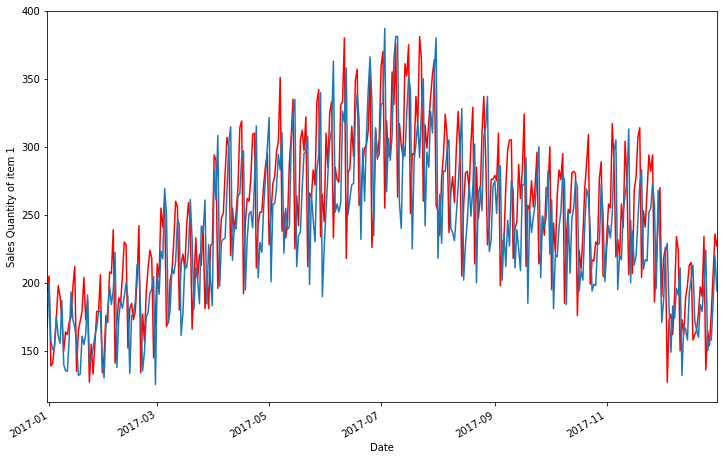

In [32]:
print("The root mean squared error is ",RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [27]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [33]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  13265.62973237289


# EXPORTING AS JSON

In [34]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2017-12-27      159.039941     1
362 2017-12-28      158.040017     1
363 2017-12-29      186.040114     1
364 2017-12-30      220.040195     1
365 2017-12-31      194.040169     1


In [35]:
export=dft.to_json(orient='records',date_format='iso')

In [49]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\minor\env\src\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2016-12-31T00:00:00.000Z","sales quantity":167.4601419676,"item":1},{"date":"2017-01-01T00:00:00.000Z","sales quantity":199.512106532,"item":1},{"date":"2017-01-02T00:00:00.000Z","sales quantity":157.6890759255,"item":1},{"date":"2017-01-03T00:00:00.000Z","sales quantity":150.8575377843,"item":1},{"date":"2017-01-04T00:00:00.000Z","sales quantity":152.6260429388,"item":1},{"date":"2017-01-05T00:00:00.000Z","sales quantity":174.8399380423,"item":1},{"date":"2017-01-06T00:00:00.000Z","sales quantity":161.2873746349,"item":1},{"date":"2017-01-07T00:00:00.000Z","sales quantity":155.4918598868,"item":1},{"date":"2017-01-08T00:00:00.000Z","sales quantity":187.0936129317,"item":1},{"date":"2017-01-09T00:00:00.000Z","sales quantity":140.119228404,"item":1},{"date":"2017-01-10T00:00:00.000Z","sales quantity":135.6171628714,"item":1},{"date":"2017-01-11T00:00:00.000Z","sales quantity":135.0202345295,"item":1},{"date":"2017-01-12T00:00:00.000Z","sales quantity":159.487404692,"item":1},{